In [3]:
!pip install pytesseract


In [4]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import os

In [5]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [6]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [7]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img


In [8]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)

In [12]:
from google.colab import files
uploaded = files.upload()

Saving text.jpeg to text.jpeg



Original Image:


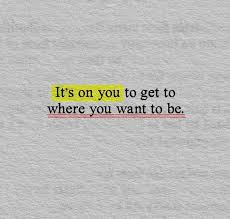


Image with Text Detection Regions:


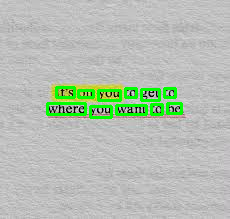


Detected Text:
Tes on you to get to where you want to be.


In [13]:
filename = list(uploaded.keys())[0]


image_loaded = cv2.imread(filename)

if image_loaded is None:
    print(f"Error: Unable to read the image file: {filename}")
else:
    print("\nOriginal Image:")
    cv2_imshow(image_loaded)


    preprocessed_image = process_image(image_loaded)


    text_boxes = text_regions(preprocessed_image)


    image_with_boxes = mark_text_regions(image_loaded, text_boxes)


    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)


    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text)